# Tutorial 4: Effective Data Visualization 

### Lecture and Tutorial Learning Goals:

Expand your data visualization knowledge and tool set beyond what we have seen and practiced so far. We will move beyond scatter plots and learn other effective ways to visualize data, as well as some general rules of thumb to follow when creating visualizations. All visualization tasks this week will be applied to real world data sets. Remember, it is an iterative process to answer questions and each step taken should have a good reason behind it.  

After completing this week's lecture and tutorial work, you will be able to:

- Describe when to use the following kinds of visualizations:
    - scatter plots
    - line plots
    - bar plots
    - histogram plots
- Given a dataset and a question, select from the above plot types to create a visualization that best answers the question
- Given a visualization and a question, evaluate the effectiveness of the visualization and suggest improvements to better answer the question
- Identify rules of thumb for creating effective visualizations
- Define the three key aspects of ggplot objects:
    - aesthetic mappings
    - geometric objects
    - scales
- Use the `ggplot2` library in R to create and refine the above visualizations using:
    - geometric objects: `geom_point`, `geom_line`, `geom_histogram`, `geom_bar`, `geom_vline`, `geom_hline`
    - scales: `scale_x_continuous`, `scale_y_continuous`
    - aesthetic mappings: `x`, `y`, `fill`, `colour`, `shape`
    - labelling: `xlab`, `ylab`, `labs`
    - font control and legend positioning: `theme`
    - flipping axes: `coord_flip`
    - subplots: `facet_grid`
- Describe the difference in raster and vector output formats
- Use `ggsave` to save visualizations in `.png` and `.svg` format

Any place you see `...`, you must fill in the function, variable, or data to complete the code. Replace `fail()` with your completed code and run the cell!

In [4]:
### Run this cell before continuing. 

library(tidyverse)
library(repr)
options(repr.matrix.max.rows = 6)
source("tests.R")
source("cleanup.R")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches


The following object is masked from ‘package:purrr’:

    is_null


The following object is masked from ‘package:tidyr’:

    matches




**Question 0.1** 
<br> {points: 1}

Match the following definitions with the corresponding aesthetic mapping or function used in R:

*Definitions*

A. Prevents a chart from being stacked. It preserves the vertical position of a plot while adjusting the horizontal position. 

B. In bar charts, this aesthetic fills in the bars by a specific colour or separates the counts by a variable different from the x-axis. 

C. In bar charts, it outlines the bars but in scatterplots, it fills in the points (colouring them based on a particular variable aside from the x/y-axis). 

D. This makes the height of each bar equal to the number of cases in each group, and it is incompatible with mapping values to the y aesthetic. This stat basically allows the y-axis to represent particular values from the data instead of just counts. 

E. This aesthetic allows further visualization of data by varying data points by shape (modifying their shape based on a particular variable aside from the x/y-axis).

F. Labels the y-axis. 


*Aesthetics and Functions*

1. `colour`
2. `dodge`
3. `fill`
4. `identity`
5. `ylab`
6. `shape`

For every description, create an object using the letter associated with the definition and assign it to the corresponding number from the list above. For example: `B <- 1`

In [5]:
A <- 2
B <- 3
C <- 1
D <- 4
E <- 6
F <- 5

In [6]:
test_0.1()

[1] "Success!"


**Question 0.2** True or False:
<br> {points: 1}

We should save a plot as an `.svg` file if we want to be able to rescale it without losing quality.

*Assign your answer to an object called `answer0.2`. Make sure your answer is in lowercase letters and is surrounded by quotation marks (e.g. `"true"` or `"false"`).*

In [7]:
answer0.2 <- "true"

In [8]:
test_0.2()

[1] "Success!"


## 1. Data on Personal Medical Costs 

As we saw in the worksheet, data scientists work in all types of organizations and with all kinds of problems. One of these types of organizations are companies in the private sector that work with health data. Today we will be looking at data on personal medical costs. There are varying factors that affect health and consequently medical costs. Our goal for today is to determine how are variables related to the medical costs billed by health insurance companies. 


To analyze this, we will be looking at a dataset that includes the following columns:

* `age`: age of primary beneficiary
* `sex`: insurance contractor gender: female, male
* `bmi`: body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg/$m^{2}$) using the ratio of height to weight, ideally 18.5 to 24.9
* `children`: number of children covered by health insurance / number of dependents
* `smoker`: smoking
* `region`: the beneficiary's residential area in the US: northeast, southeast, southwest, northwest.
* `charges`: individual medical costs billed by health insurance

*This dataset, was taken from the [collection of Data Sets](https://github.com/stedy/Machine-Learning-with-R-datasets) created and curated for the [Machine Learning with R](https://www.packtpub.com/big-data-and-business-intelligence/machine-learning-r) book by Brett Lantz.*

**Question 1.1** Yes or No: 
<br> {points: 1}

Based on the information given in the cell above, do you think the column `charges` includes quantitative/numerical data? 

*Assign your answer to an object called `answer1.1`. Make sure your answer is written in lowercase and is surrounded by quotation marks (e.g. `"yes"` or `"no"`).*

In [9]:
answer1.1 <- "yes"

In [10]:
test_1.1()

[1] "Success!"


**Question 1.2** Multiple Choice:
<br> {points: 1}

Assuming overplotting is not an issue, which plot would be the most effective to compare the relationship of `age` and `charges`?

A. Scatterplot 

B. Stacked Bar Plot 

C. Bar Plot 

D. Histogram 

*Assign your answer to an object called `answer1.2`. Make sure your answer is an uppercase letter and is surrounded by quotation marks (e.g. `"F"`).*

In [11]:
answer1.2 <- "A"

In [12]:
test_1.2()

[1] "Success!"


**Question 1.3**
<br> {points: 1}

Read the `insurance.csv` file in the `data/` folder and use `tail` to view the last 6 individuals presented. 

*Assign your answer to an object called `insurance`.*

In [13]:
insurance <- read_csv("data/insurance.csv")
tail(insurance) # preview the last 6 rows of the data set

Parsed with column specification:
cols(
  age = col_double(),
  sex = col_character(),
  bmi = col_double(),
  children = col_double(),
  smoker = col_character(),
  region = col_character(),
  charges = col_double()
)



age,sex,bmi,children,smoker,region,charges
<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
52,female,44.70,3,no,southwest,11411.685
50,male,30.97,3,no,northwest,10600.548
18,female,31.92,0,no,northeast,2205.981
18,female,36.85,0,no,southeast,1629.833
21,female,25.80,0,no,southwest,2007.945
61,female,29.07,0,yes,northwest,29141.360


In [14]:
test_1.3()

[1] "Success!"


**Question 1.4** 
<br> {points: 3}

Looking over the loaded data shown above, what observations can you make about the relationship between medical charges and age? How about medical charges and BMI? Finally, what about medical charges and smoking? 

Also, comment on whether our observations might change if we visualize the data? And/or whether visualizing the data might allow us to more easily make observations about the relationships in the data as opposed to trying to make them directly from the data table?

Answer in the cell below.

1. Relationship between medical charges and age: Older the person in the observation, the higher the medical bills they were charged
2. Relationship between medical charges and BMI: There seems to be no relationship between medical bills they were charged. As the 50 years old male with 30.97bmi paid 10600.548 despite 18 years old female with similar bmi at 31.92 paid 2205.981.
3. Relationship between medical charges and smoking: The observation demonstrates that the smokers are charged higher medical bills

**Question 1.5**
<br> {points: 1}

According to the National Heart, Lung and Blood Institute of the US: "The higher your BMI, the higher your risk for certain diseases such as heart disease, high blood pressure, type 2 diabetes, gallstones, breathing problems, and certain cancers". 

Based on this information, we can hypothesize that individuals with a higher BMI are likely to have more medical costs. Let's use our data and see if this holds true. Create a scatter plot of `charges` (y-axis) versus `bmi` (x-axis).

In the scaffolding we provide below, we suggest that you set `alpha` to a value between 0.2 and 0.4. `alpha` sets the transparency of points on a scatter plot, and increasing transparencing of points is one tool you can use to deal with over plotting issues.

*Assign your answer to an object called `bmi_plot`. Make sure to label your axes appropriately.*

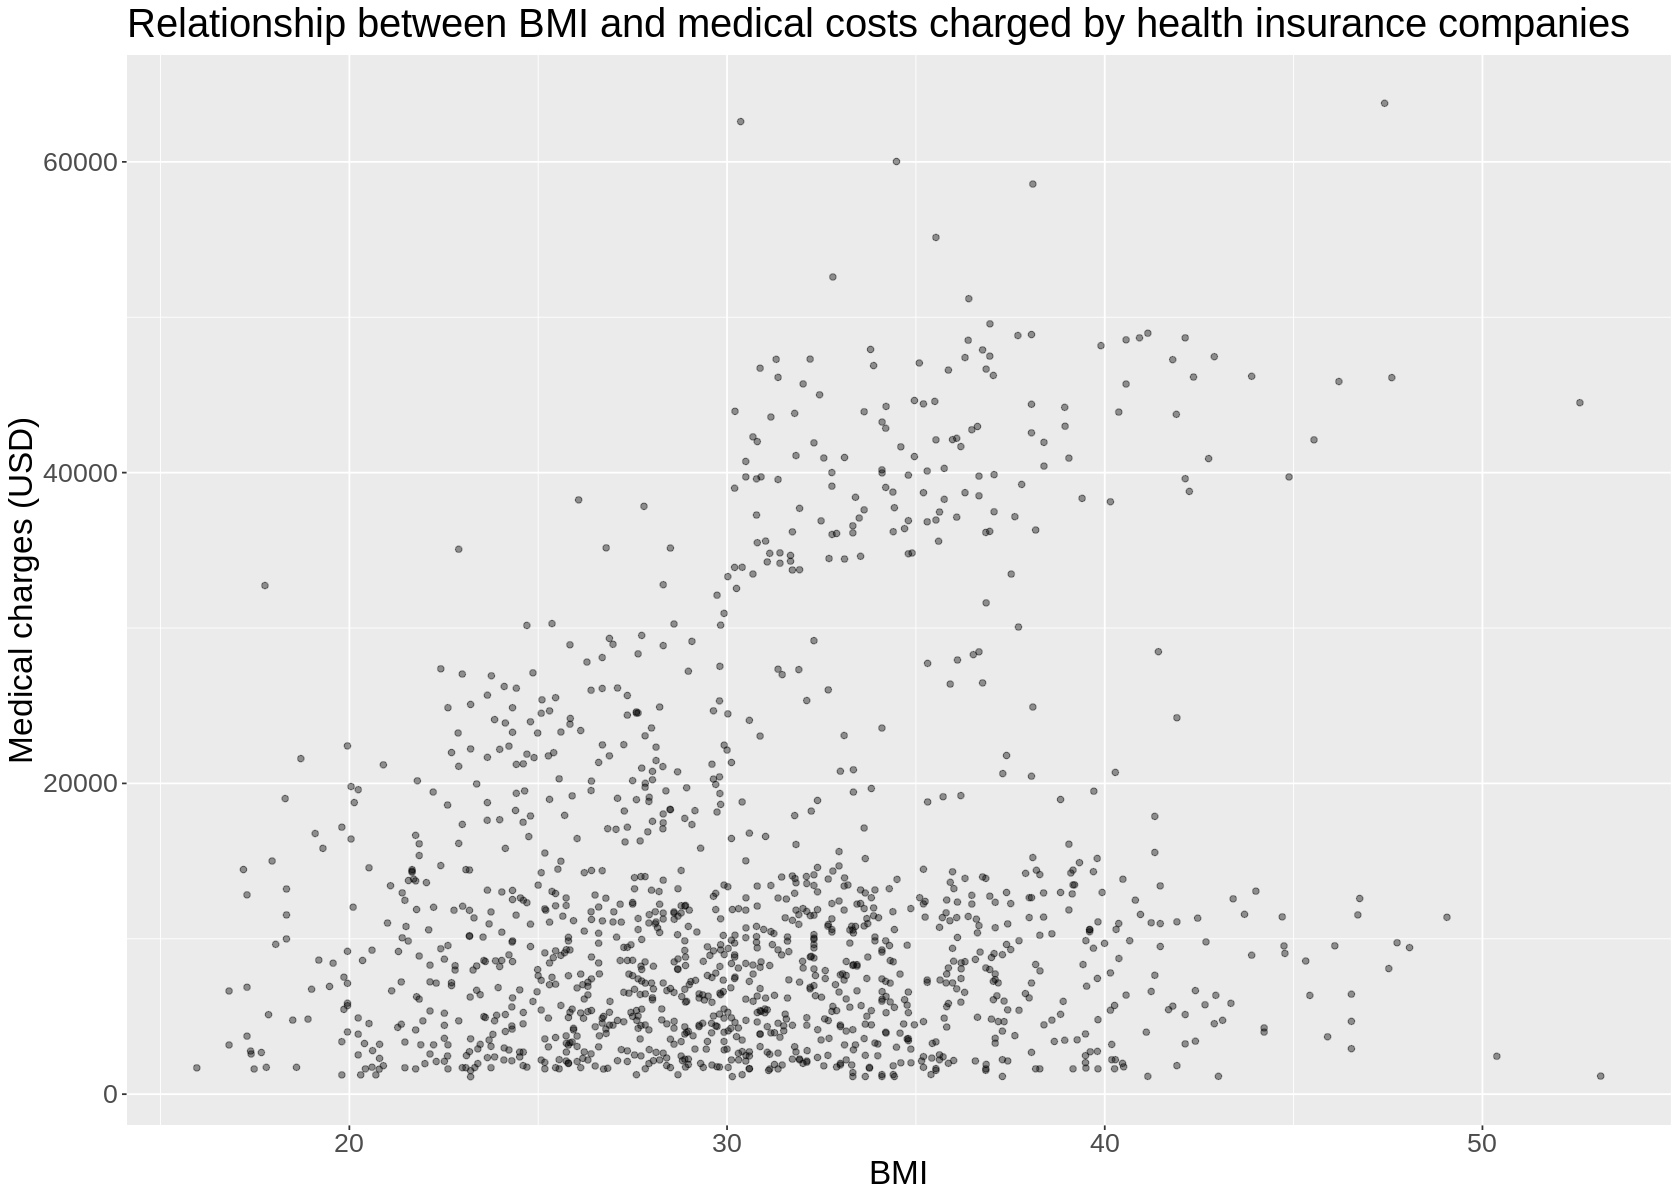

In [15]:
options(repr.plot.width = 14, repr.plot.height = 10) #Remember to set your plot sizes to an appropiate size

#... <- insurance %>%
#    ggplot(aes(x = ..., y =  ...)) + 
#        geom_...(alpha = ...) + # Deals with the transparency of the points, set it to an appropiate value
#        xlab(...) +
#        ylab(...) +
#        ggtitle(...)

bmi_plot <- insurance %>%
    ggplot(aes(x = bmi, y = charges)) +
    geom_point(alpha = 0.4) +
    xlab('BMI') +
    ylab("Medical charges (USD)") +
    ggtitle("Relationship between BMI and medical costs charged by health insurance companies") +
    theme(text = element_text(size=20))

bmi_plot

In [16]:
test_1.5()

[1] "Success!"


**Question 1.6**
<br> {points: 3}

Analysis: Comment on the effectiveness of the plot. Take into consideration the rules of thumb discussed in lecture. Also comment on what could be improved for this plot and also what is done correctly. 

Answer in the cell below.

Scatter plot is great for visualizing the relationship between two quantifiable variables. In this case we are investigating the relationship between the BMI of the person and the medical costs billed by insurance companies. To improve the readability of the graph, we also used alpha argument inside the geom_point for transparancy of the points. Therefore, overlapping points can be highlighed by darker points on the graph. In question 1.4 we have observed that there is a relationship between medical charges and smoking. If we apply colors by group such as smokers and non smokers, we should be able to see if there collaborative effect of BMI and smoking together on the medical costs. 

**Question 1.7**
<br> {points: 3}

Analysis: What do you observe from the scatter plot? Do the data suggest that there might be evidence of a relationship between BMI and medical costs of individuals? 
From this plot alone, can we say higher BMI causes higher medical charges? Why or why not? 

Answer in the cell below. 

Some parts of the graph demonstrats clear positive relationship between BMI and medical bills. However this only applies to small sample size from the observations. On the other hand, with the majority of the points of the scattor plot distributed below 20,000USD regardless of the level of BMI, the relationship is very weak and since a straight line would not fit appropriately with the points of the point, there is no linearity as well. Consequently, from this plot alone, we cannot say that higher BMI causes higher medical charges.

**Question 1.8**
<br> {points: 3}

Again, based on information from the National Heart, Lung and Blood Institute of the US, smoking cigarettes is said to be a risk factor for obesity. Create the same plot as you did in **Question 1.5** but this time add the `colour` aesthetic to observe if smoking might affect the body mass of individuals. Also, use `labs` to format your legend title. You may want to pass `alpha = 0.4` to the scatter geometric object to make the scatter points translucent (just for your own ease of visualization; you don't have to and we won't check that when grading).

*Assign your answer to an object called `smoke_plot`. Make sure to label your axes appropriately.*

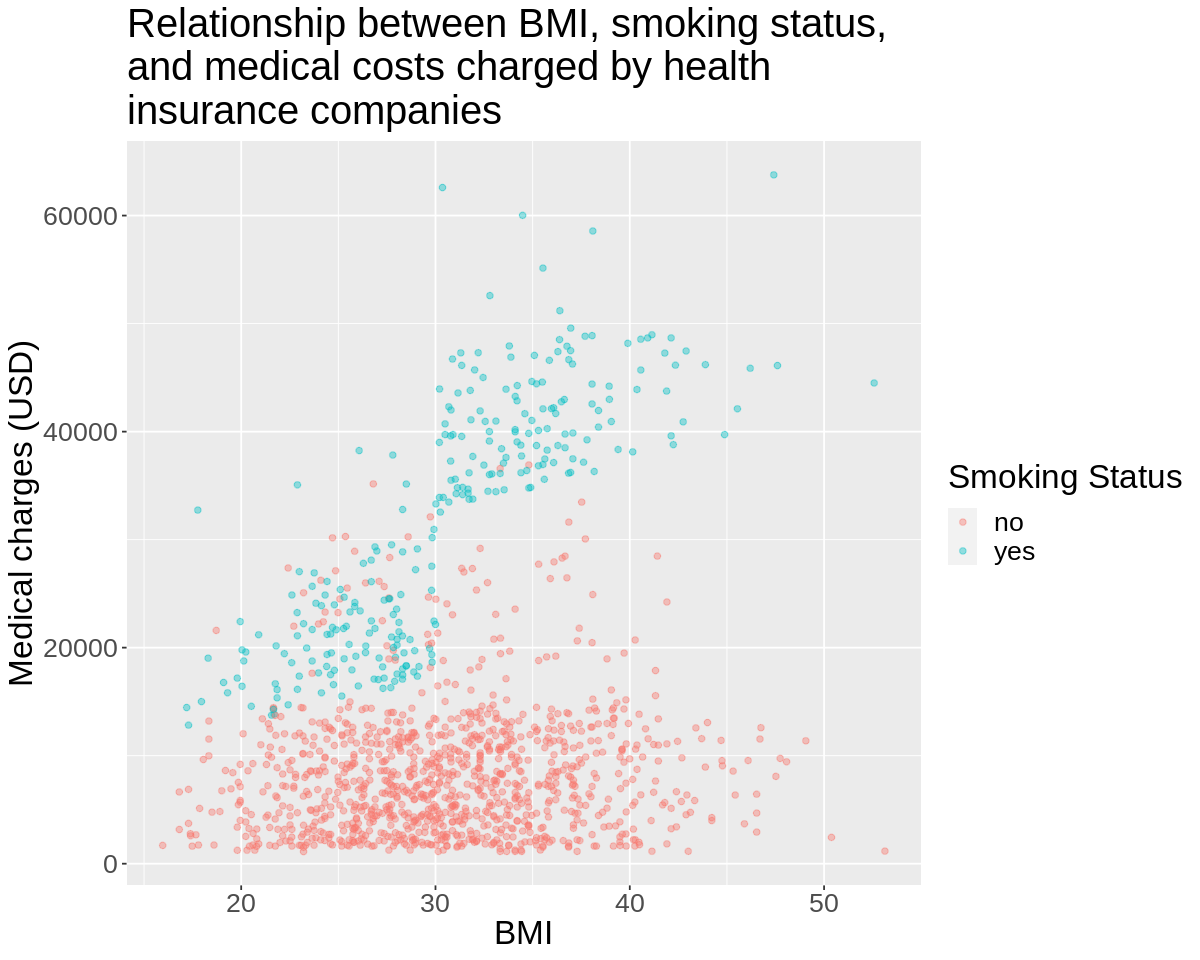

In [17]:
options(repr.plot.width = 10, repr.plot.height = 8) #Remember to set your plot sizes to an appropiate size

smoke_plot <- insurance %>%
    ggplot(aes(x = bmi, y = charges)) +
    geom_point(alpha = 0.4, aes(color = smoker)) +
    labs(x = 'BMI', y = 'Medical charges (USD)', color = 'Smoking Status') +
    ggtitle("Relationship between BMI, smoking status, 
and medical costs charged by health
insurance companies") +
    theme(text = element_text(size=20))
smoke_plot

In [18]:
# Most of the tests for this question are hidden. You have to decide whether you've created a good visualization!
# here's one test to at least ensure you named the plot object correctly:
expect_true(exists("smoke_plot"))


**Question 1.9.0** (Analyzing the Graph) True or False: 
<br> {points: 1}

Smokers generally have a lower BMI than non-smokers. 

*Assign your answer to an object called `answer1.9.0`. Make sure your answer is in lowercase and is surrounded by quotation marks (e.g. `"true"` or `"false"`).*

In [19]:
answer1.9.0 <- "false"

In [20]:
test_1.9.0()

[1] "Success!"


**Question 1.9.1** (Analyzing the Graph) True or False: 
<br> {points: 1}

Smokers generally have higher medical charges than non-smokers.

*Assign your answer to an object called `answer1.9.1`. Make sure your answer is in lowercase and is surrounded by quotation marks (e.g. `"true"` or `"false"`).*

In [21]:
answer1.9.1 <- "true"

In [22]:
test_1.9.1()

[1] "Success!"


**Question 1.10**
<br> {points: 1}

Finally, create a bar graph that displays the proportion of smokers for both females and males in the data set. Use sex as the horizontal axis, and colour the bars to differentiate between smokers / nonsmokers. This could, for example, be used help us determine whether we should consider smoking behaviour when exploring whether there is a relationship between sex and medical costs.

*Assign your answer to an object called `bar_plot`. Make sure to label your axes appropriately.*

>*Note - many historical datasets treated sex as a variable where the possible values are only binary: male or female. This representation in this question reflects how the data were historically collected and is not meant to imply that we believe that sex is binary.*

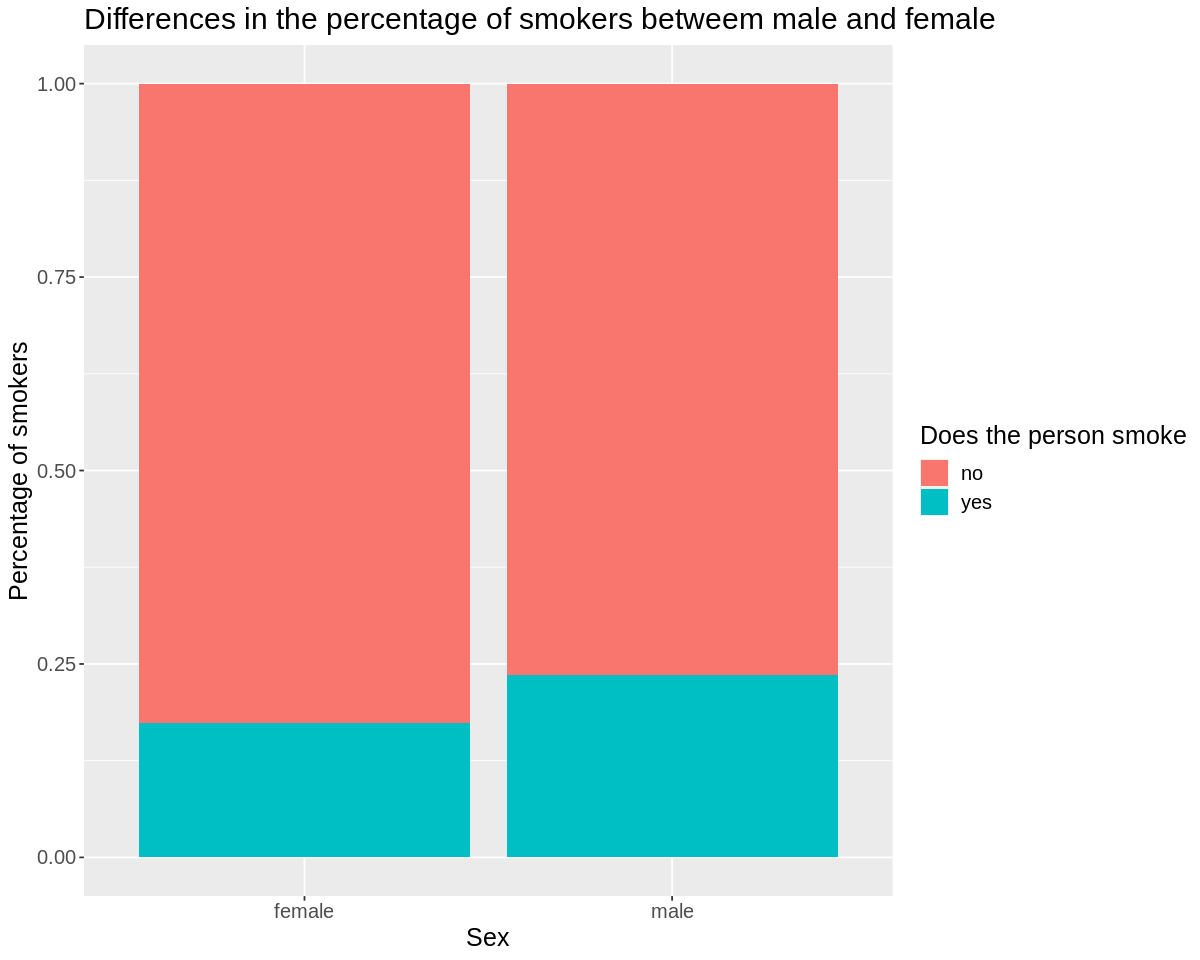

In [23]:
#... <- insurance %>%
#    ggplot(aes(x = ..., fill = ...)) + 
#    ..._...(position = 'fill') + 
#    xlab(...) +
#    ylab(...) +
#    labs(fill = "Does the person smoke") +
#    ggtitle(...)
options(repr.plot.width = 10, repr.plot.height = 8)
bar_plot <- insurance %>%
    ggplot(aes(x = sex, fill = smoker)) +
    geom_bar(position = 'fill') +
    xlab("Sex") +
    ylab("Percentage of smokers") +
    labs(fill = "Does the person smoke") +
    ggtitle("Differences in the percentage of smokers betweem male and female") +
    theme(text = element_text(size=15))

bar_plot

In [24]:
test_1.10()

[1] "Success!"


**Question 1.11**
<br> {points: 1}

Based on the graph, is the proportion of smokers higher amongst men or women?

*Assign your answer to an object called `answer1.11`. Make sure your answer is in lowercase and is surrounded by quotation marks (e.g. `"male"` or `"female"`).*

In [25]:
answer1.11 <- "male"

In [26]:
test_1.11()

[1] "Success!"


## 2. Color Palettes (beyond the defaults)
{points: 3}

In the worksheet and this tutorial, you have seen the same colours again and again. These are from the default `ggplot2` color palette. What if you want different colors? We can do this! In R, one of the libraries that provides altenative color palettes is the `RColorBrewer` library. 

For this question:

- Load the `RColorBrewer`library
- Print the list of palettes available for you with the `display.brewer.all()` function
- You can also print out a list of color blind friendly palettes with `display.brewer.all(colorblindFriendly = T)`
- Choose one of the palettes and apply it to the plot whose code is given in the cell below.
    - For the fill aesthetic with categorical variable the function is: `scale_fill_brewer(palette = '...')`
    - For the fill aesthetic with numeric variable the function is: `scale_fill_distiller(palette = '...')`
- Finally, you can also use this [color blindness simulator](https://www.color-blindness.com/coblis-color-blindness-simulator/) to check if your visualizations are color blind friendly

You can look more in depth into the documentation of the `scale_fill_*` functions here: https://ggplot2.tidyverse.org/reference/scale_brewer.html

*Assign your answer to an object called `diamonds_plot`.*

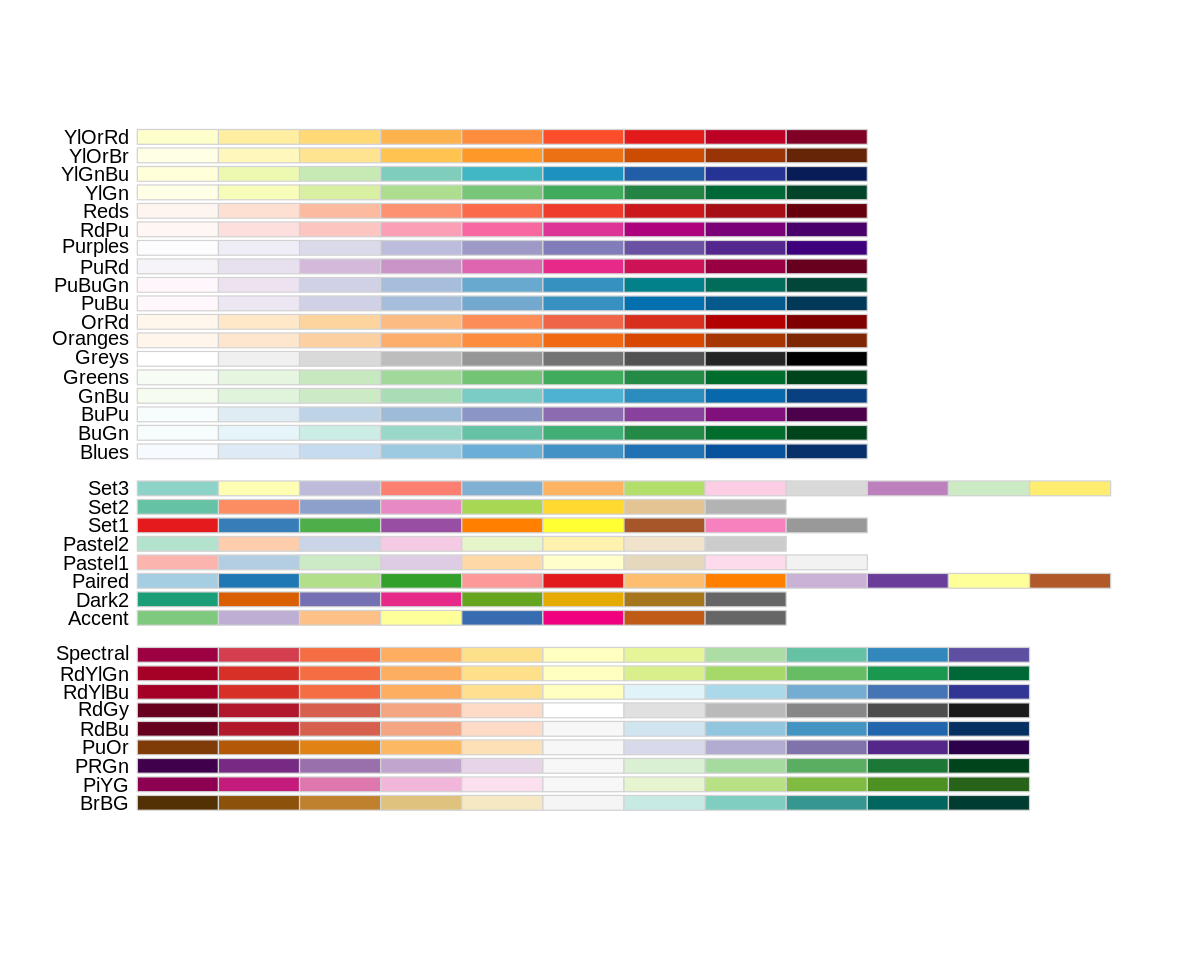

In [27]:
## Run this cell and to explore the RColorBrewer features
library(RColorBrewer)
display.brewer.all()

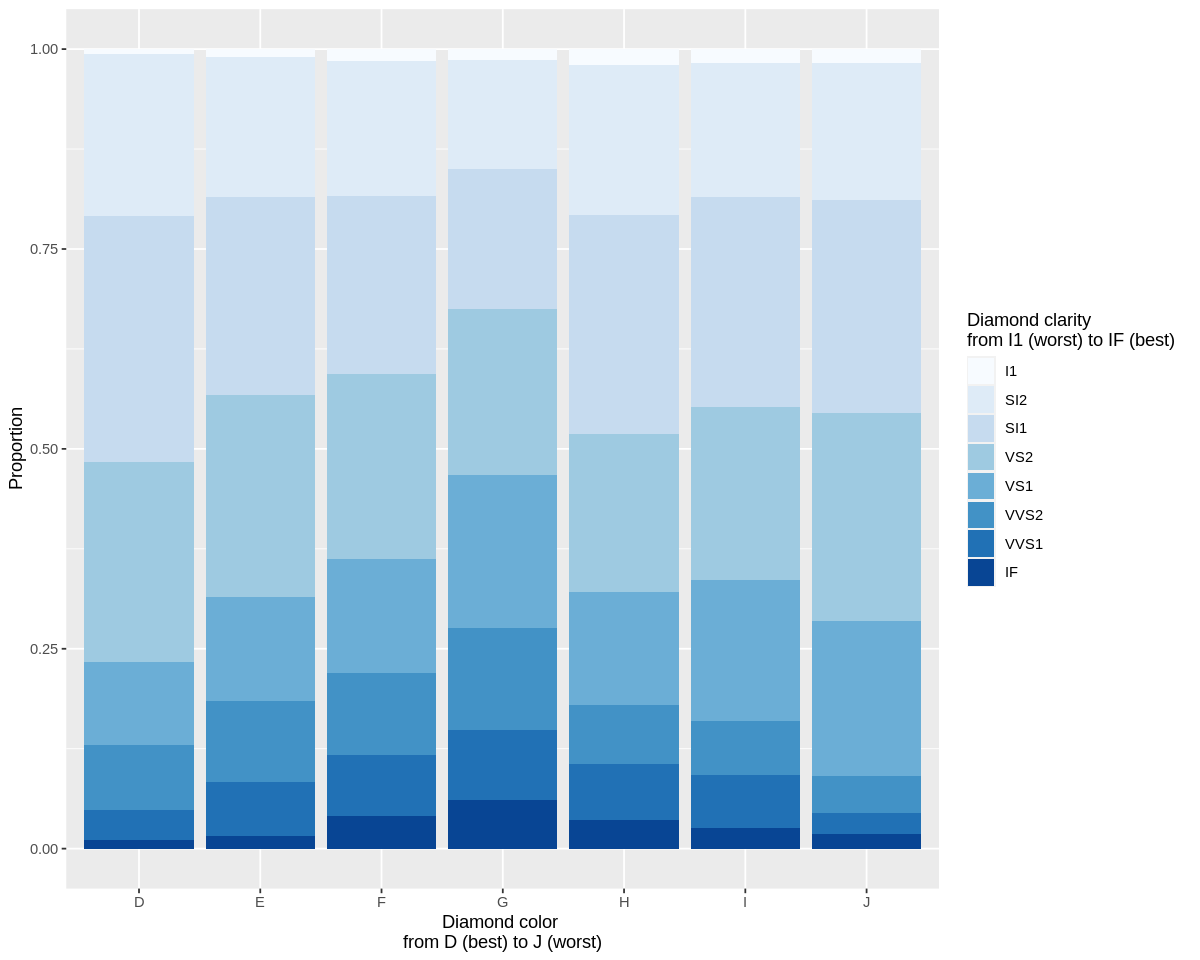

In [28]:
diamonds_plot <- diamonds %>%
    ggplot(aes(x = color, fill = clarity)) + 
    geom_bar(position = 'fill') +
    xlab('Diamond color \nfrom D (best) to J (worst)') +
    ylab('Proportion') +
    labs(fill = "Diamond clarity \nfrom I1 (worst) to IF (best)") 

#Below, insert your colour palette choice via
#... <- diamonds_plot + 
#       ...(palette = ...)

diamonds_plot <- diamonds_plot +
    scale_fill_brewer(palette = "Blues")

diamonds_plot

## 3. Fast-Food Chains in the United States (Continued)
<br> {points: 6}

In Worksheet 04, we explored this data set through some visualizations. Now, it is is all up to you. The goal of this assignment is to create **one** plot that can help you figure out which restaurant to open and where! After that you need to write a paragraph explaining your visualization and why you chose it. Also, explain your conclusion from the visualization and reasoning as to how you came to that conclusion. If you need to bring in outside information to help you answer your question, please feel free to do so.  Finally, if there is some way that you could improve your visualization, but don't yet know how to do it, please explain what you would do if you knew how.

In answering this question, there is no need to restrict yourself to the west coast of the USA. Consider all states that you have data for. You have a variety of graphs to choose from, but before starting the assignment, discuss with a partner which plot would be the most optimal to answer this question.

<img src="mcdonalds.jpg" width = "300"/>


Hint: The function `pull` from the `dplyr` package selects a column in a data frame and transforms it into a vector. Note: There are different ways you can complete this question so you don't necessarily need to use `pull` (you may find a solution without using it) but it may be helpful.


In [29]:
col_names <- colnames(n_locations_st)
col_names

ERROR: Error in is.data.frame(x): object 'n_locations_st' not found


Parsed with column specification:
cols(
  name = col_character(),
  st = col_character()
)

`summarise()` ungrouping output (override with `.groups` argument)

Warning message:
“`tbl_df()` is deprecated as of dplyr 1.0.0.
Please use `tibble::as_tibble()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


# A tibble: 10 x 2
   name               n
   <chr>          <int>
 1 McDonald's      1886
 2 Burger King     1154
 3 Taco Bell        873
 4 Wendy's          731
 5 Arby's           518
 6 KFC              421
 7 Domino's Pizza   345
 8 Subway           322
 9 SONIC Drive In   226
10 Hardee's         192


Joining, by = "name"

`summarise()` ungrouping output (override with `.groups` argument)



st,n
<chr>,<int>
OH,380
CA,347
TX,344
FL,316
IN,310


Joining, by = "name"

`summarise()` ungrouping output (override with `.groups` argument)



st,n
<chr>,<int>
RI,19
HI,17
DC,12
AK,9
Co Spgs,3


`summarise()` ungrouping output (override with `.groups` argument)



name,n
<chr>,<int>
Burger King,5
Wendy's,4
KFC,3
⋮,⋮
B Z Breakfast Burgers Beyond,1
Greek Oven Pizza and Wings,1
Royal Buffet,1


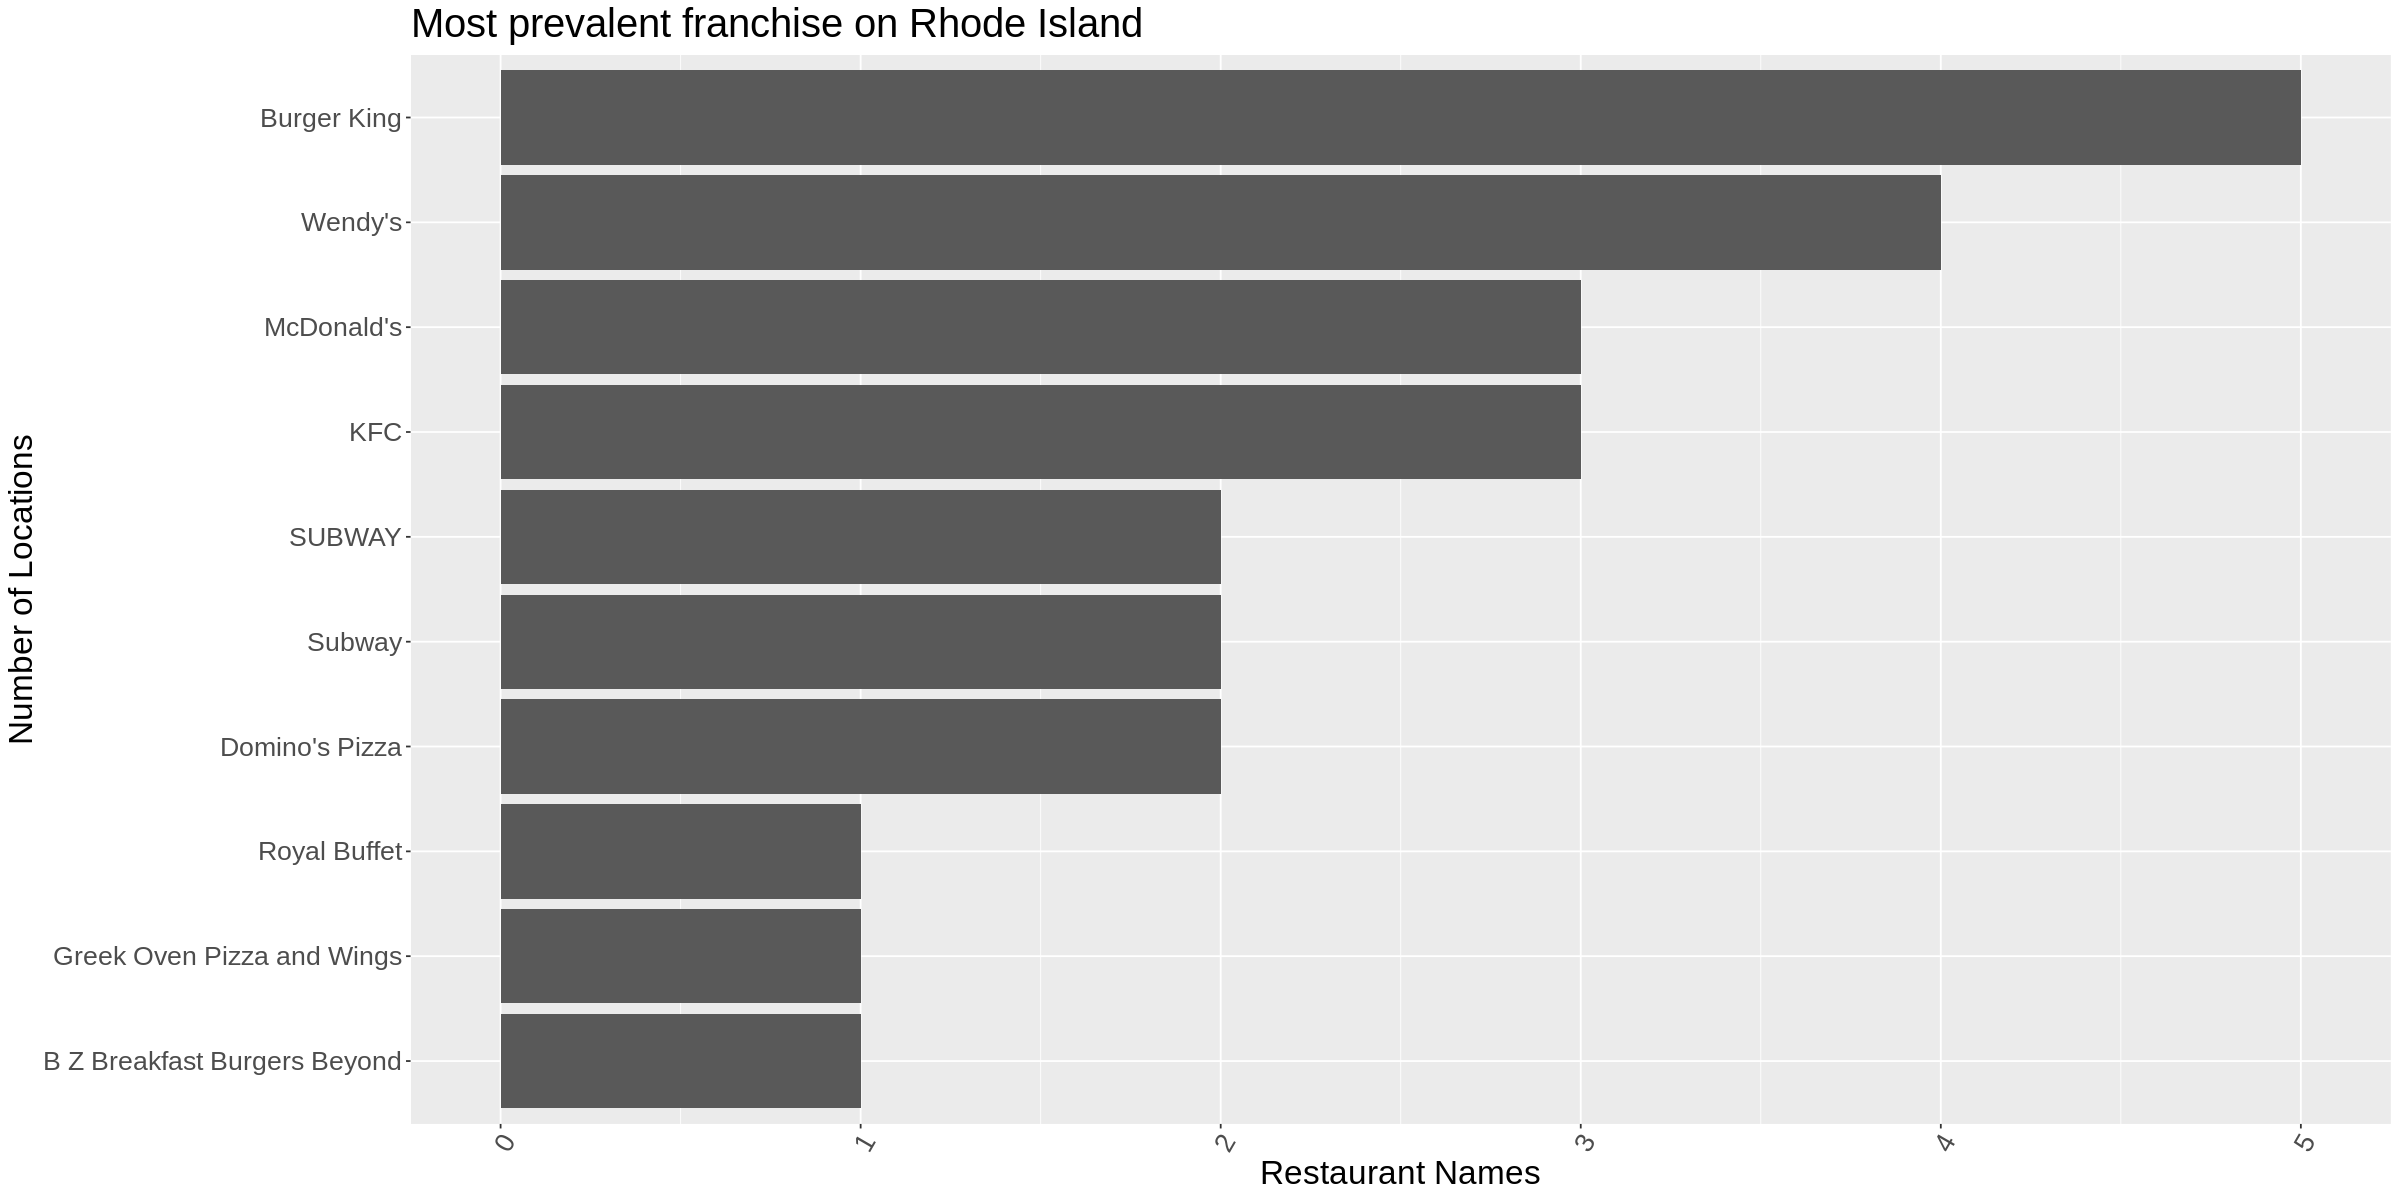

In [30]:
fast_food <- read_csv("data/fast_food.csv")


top_fast_food <- fast_food %>%
    group_by(name) %>%
    summarize(n = n()) %>%
    arrange(desc(n)) %>%
    head(n = 10)
print(tbl_df(top_fast_food), n=10)

top_n_locations <- fast_food %>%
    semi_join(top_fast_food) %>%
    group_by(st) %>%
    summarize(n = n()) %>%
    arrange(desc(n)) %>%
    head(n = 5)
top_n_locations

bottom_n_locations <- fast_food %>%
    semi_join(top_fast_food) %>%
    group_by(st) %>%
    summarize(n = n()) %>%
    arrange(desc(n)) %>%
    tail(n = 5)
bottom_n_locations

top_restaurants_RI <- fast_food %>%
    filter(st %in% c("RI")) %>%
    group_by(name) %>%
    summarize(n = n()) %>%
    arrange(desc(n))
top_restaurants_RI

# count_bar_chart <- ggplot(top_restaurants, aes(x = name, y = n)) +
#     geom_bar(stat = "identity") +
#     xlab("Restaurant Names") +
#     ylab("Number of Locations") +
#     ggtitle("Most prevalent franchise on the west coast of the US") +
#     theme(text = element_text(size = 20))

options(repr.plot.width = 20, repr.plot.height = 10)
RI_plot <- ggplot(top_restaurants_RI, aes(x = n, y = reorder(name,n))) +
    geom_bar(stat = "identity") +
    labs(x = "Restaurant Names", y = "Number of Locations") +
    ggtitle("Most prevalent franchise on Rhode Island") +
    theme(text = element_text(size=20)) +
    theme(axis.text.x = element_text(angle = 60, hjust = 1))
RI_plot

In this case study, I am assuming here that the number of locations reflects the demand for such franchise. Therefore, the list below reflects the top 10 most popular fast food franchises in the United States for this case study.

Top 10 most popular fast food restaurants in the United States (in terms of number of locations they are operating)
1. McDonald's
2. Burger King
3. Taco Bell
4. Wendy's
5. Arby's
6. KFC
7. Domino's Pizza
8. Subway
9. Sonic Drive In
10. Hardee's

From top_n_locations, I've found that these following states below has the most fast food restaurants in the United States.
Top 5 states with most number of fast food restaurants
1. Ohio
2. California
3. Texas
4. Florida
5. Indiana
This indicates that if we were to newly open a location in one of these 5 states, it is highly likely to face a high degree of competition. Therefore, I'll be avoiding these states to open up a new location.


Therefore, for my next step I found 5 states that have the least number of fast food restaurants. The bottom_n_locations shows that following states below has the least number of fast food restaurants in the United States.
Bottom 5 states with least number of fast food restaurants
1. Colorado Springs
2. Alaska
3. District of Columiba
4. Hawaii
5. Rhode Island

According to https://worldpopulationreview.com/state-rankings/state-densities, these are the top 10 and bottom 10 states in terms of population density in the United States.

US population density by state
Top 10
1. New Jersey (1,206 people per square mile)
2. Rhode Island (1,028 people per square mile)
3. Massachusetts (887 people per square mile)
4. Connecticut (732 people per square mile)
5. Maryland (626 people per square mile)
6. Delaware (512 people per square mile)
7. Florida (414 people per square mile)
8. New York (408 people per square mile)
9. Ohio (287 people per square mile)
10. Pennsylvania (286 people per square mile)

Bottom 10
1. Alaska: 1.28/mi²
2. Wyoming: 6/mi²
3. Montana: 7.42/mi²
4. North Dakota: 11.09/mi²
5. South Carolina: 11.78/mi²
6. New Mexico: 17.36/mi²
7. Idaho: 22.11/mi²
8. Nebraska: 25.22/mi²
9. Nevada: 28.59/mi²
10. Kansas: 35.64/mi²

From the external data on population density and our own fast_food.csv data frame, we now know that Rhode Island is second most population dense state in US with the 5th least number of fast food restaurants in the United States. Which means, due to high population density, opening a restaurant has opportunity to reach high volume of potential customers with less competition. Therefore, I choose Rhode Island to be the location to open a new fast food restaurant.

Now that we have figured out where to open the new restaurants, I'll be looking at which franchise to open in Rhode Island.
The bar chart shows top 10 most prevalent fast food franchises in Rhode Island. I chose to use a bar chart because I'm comparing the quantity of different types of restaurants and bar chart is good for comparing amount among categories. Of the top 10 fast food chains, it is missing Taco Bell, Arby's, Sonic Drive In, and Hardee's which are top 3, 5, 9, 10 in respective order for most popular fast food restaurants in the United States, which were shown by top_fast_food. However, one limitation of this graph is that there are two overlapping data for subway because it has been labelled differently(Subway, and SUBWAY). Nonetheless, it does not affect the data because it just makes it 2nd most popular fast food franchise in Rhode Island, and I'm looking for the list of popular fast food franchises in Rhode Island and not its rankings.

Taco Bell's total location in the United States is 873, and 518, 226, 192 for Arby's Sonic Drive In, and Hardee's respectively. As mentioned above, I am regarding number of locations as the indicator for the demand for such franchise. Therefore, I'll be disregarding Sonic Drive In and Hardees from consideration as their total locations added together is still less than the total locations operated by Arby's. Furthermore, of the 10 most popular fast food franchise in Rhode Island, 4 of them are specializing in burgers (McDonald's, Wendy's, Burger King, and, BZ Breakfast Burgers Beyond). In addition, 3 of which (McDonald's, Burger King, and Wendy's) are higher in the rankings in terms of number of locations operated in the United States. Consequently, if we open a new Arby's restaurant, although burgers are favorite type of fast food in Rhode Island, it is likely to face a higher degree of competition. Thus, face a competition against those who are more demanded than Arby's by the country as a whole. Therefore, from this method of deduction, Taco Bell is most preferable choice of fast food franchise to open in Rhode Island.

Consequently, I'll be choosing to open a new location for the Taco Bell in Rhode Island state of the United States.


Reference list:
United States by Density 2022. World Population Review. (n.d.). Retrieved May 29, 2022, from https://worldpopulationreview.com/state-rankings/state-densities 

In [ ]:
source("cleanup.R")